<a href="https://colab.research.google.com/github/robitussin/CCDATSCL_EXERCISES/blob/main/Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5

In [72]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


## Part 1: ANOVA

A teacher wants to investigate whether different teaching methods affect students’ exam scores. The dataset contains 50 students, each assigned to one of three teaching methods (A, B, or C).

Question: "Is there a difference in mean exam scores among students taught using three different teaching methods?"

- Independent variable (factor): Teaching Method (A, B, C)
- Dependent variable: Exam Score (numeric)

In [73]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/exam_scores.csv?raw=true"

df_exam_scores = pd.read_csv(url)
df_exam_scores


,StudentID,Method,Score
0,1,A,79
1,2,A,77
2,3,A,82
3,4,A,75
4,5,A,80
5,6,A,78
6,7,A,83
7,8,A,76
8,9,A,81
9,10,A,74


Calculate the number of students in each teaching method.

In [74]:
df_exam_scores['Method'].value_counts()

Method
A    17
B    17
C    16
Name: count, dtype: int64

Compute the mean and standard deviation of exam scores for each group.

In [75]:
# Mean Scores

df_exam_scores.groupby('Method')['Score'].mean()

Method
A    78.588235
B    86.294118
C    71.937500
Name: Score, dtype: float64

In [76]:
# Standard Deviation

df_exam_scores.groupby('Method')['Score'].std()

Method
A    2.575336
B    2.365500
C    1.768945
Name: Score, dtype: float64

Use a plot to show the exam scores by teaching method.

<Figure size 800x500 with 0 Axes>

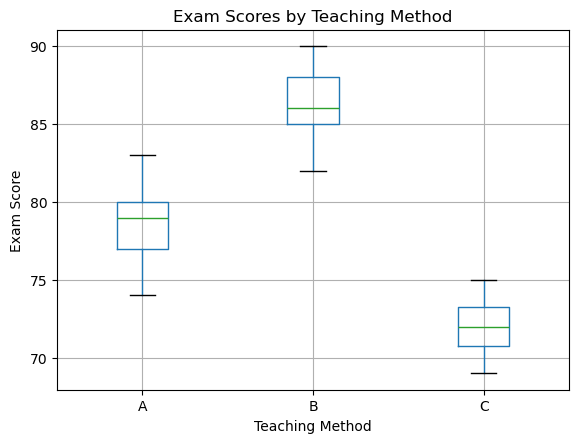

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
df_exam_scores.boxplot(column="Score", by="Method")
plt.title("Exam Scores by Teaching Method")
plt.suptitle("")
plt.xlabel("Teaching Method")
plt.ylabel("Exam Score")
plt.show()


Perform the ANOVA Test
- Use scipy.stats.f_oneway to conduct a one-way ANOVA.
- Report the F-statistic and p-value.
- Using a significance level of α = 0.05, state whether you reject or fail to reject H₀.

In [78]:
group_a = df_exam_scores[df_exam_scores['Method'] == 'A']['Score']
group_b = df_exam_scores[df_exam_scores['Method'] == 'B']['Score']
group_c = df_exam_scores[df_exam_scores['Method'] == 'C']['Score']

In [79]:
# Perform One-way ANOVA
f_statistic, p_value = stats.f_oneway(group_a, group_b, group_c)

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Significant difference found (Reject H0)")
else:
    print("No significant difference found (Fail to reject H0)")

F-statistic: 165.1785
P-value: 0.0000
Significant difference found (Reject H0)


Interpret the results. What does it say about the relationship between teaching method and exam scores?

**Analysis**

- The analysis yielded a very large F-statistic (F = 165.18) with a p-value less than 0.05. Therefore, the null hypothesis was rejected, indicating a statistically significant relationship between teaching method and exam scores. 
- `This result suggests that at least one teaching method leads to a significantly different mean exam score compared to the others.`

## Part 2: Chi-squared

A survey was conducted to see if there is a relationship between gender and littering behavior.

Question:
"Is gender associated with littering behavior?"

Each row represents one person.

In [80]:
url = "https://github.com/robitussin/CCDATSCL_EXERCISES/blob/f56f00991116fcb717a8827d324aa6f599dea366/litteringdata.csv?raw=true"

df_littering_data = pd.read_csv(url)
df_littering_data

,ID,Gender,Litter
0,1,Male,Yes
1,2,Male,Yes
2,3,Male,Yes
3,4,Male,Yes
4,5,Male,Yes
5,6,Male,Yes
6,7,Male,Yes
7,8,Male,Yes
8,9,Male,Yes
9,10,Male,Yes


Count the number of observations in each category for Gender and Litter separately.

In [81]:
df_littering_data['Gender'].value_counts()

Gender
Male      20
Female    20
Name: count, dtype: int64

In [82]:
df_littering_data['Litter'].value_counts()

Litter
No     22
Yes    18
Name: count, dtype: int64

Using `pd.crosstab()`, create a contingency table showing counts of littering behavior for each gender.
- Write down the row totals, column totals, and grand total from the table.

In [83]:
table_with_totals = pd.crosstab(
    df_littering_data['Litter'],
    df_littering_data['Gender'],
    # margins=True,        # uncomment to add totals
    # margins_name="Total" # uncomment to name the totals column/row
)

table_with_totals


Gender,Female,Male
Litter,,
No,14,8
Yes,6,12


For gender columns, the number of `Females is 20` and the `Males is also 20`. For Litter rows, the number of `Litter 'No' is 22` and the number of `Litter 'Yes' is 18`.

State the null hypothesis (H₀) and alternative hypothesis (H₁) for this chi-squared test.

`Null Hypothesis (H₀) `
- There is no association between gender and littering behavior. In other words, gender and littering are independent.

`Alternative Hypothesis (H₁)`
- There is an association between gender and littering behavior. In other words, gender and littering are not independent.

Use scipy.stats.chi2_contingency to calculate:
- Chi-squared statistic
- p-value
- Degrees of freedom

In [86]:
chi2, p_value, dof, expected = chi2_contingency(table_with_totals)

print(f"\nChi-square statistic: {chi2}")
print(f"P-value: {p_value}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies table:")
print(expected)


Chi-square statistic: 2.525252525252525
P-value: 0.11203684368556356
Degrees of freedom: 1
Expected frequencies table:
[[11. 11.]
 [ 9.  9.]]


Using a significance level of `α = 0.05`, determine whether to reject or fail to reject H₀.


In [87]:
alpha = 0.05
if p_value < alpha:
    print("Significant difference found (Reject H0)")
else:
    print("No significant difference found (Fail to reject H0)")

No significant difference found (Fail to reject H0)


Interpret your results. Is there evidence that gender and littering behavior are associated?

**Analysis**
- The chi-square test indicates that there is no significant association between gender and littering behavior (p > 0.05). `Therefore, gender and littering behavior are independent.`